<a href="https://colab.research.google.com/github/SpyroRock/Reconstruction/blob/master/reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/SpyroRock/Reconstruction
%cd Reconstruction

Cloning into 'Reconstruction'...
remote: Enumerating objects: 101, done.
remote: Total 101 (delta 0), reused 0 (delta 0), pack-reused 101
Receiving objects: 100% (101/101), 166.79 MiB | 18.37 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Checking out files: 100% (15/15), done.
/content/Reconstruction


In [2]:
from model_structure import create_model
from model_structure_256x64 import create_model_256_64
from keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow import multi_gpu_model
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
from numpy import load, save
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
import pickle

In [3]:
img_height = 256
img_width = 256

img_height_test = 64
img_width_test = 64

speckle_data = load('speckle_array_case0.npy')
#speckle_data = tf.constant(speckle_data, dtype=tf.uint8)
#print(tf.constant(speckle_data))
print(speckle_data.shape)

speckle_labels = load('symbol_array_case0.npy')
#speckle_labels = tf.constant(speckle_labels, dtype=tf.uint8)
#print(tf.constant(speckle_labels))
print(speckle_labels.shape)

(258, 256, 256)
(258, 64, 64)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(speckle_data, speckle_labels, test_size=0.1, random_state=42)

X_train = X_train.reshape(-1, img_height, img_width, 1)
X_test = X_test.reshape(-1, img_height, img_width, 1)
input_shape = (img_height, img_width, 1)

y_train = y_train.reshape(-1, img_height_test, img_width_test, 1)
y_test = y_test.reshape(-1, img_height_test, img_width_test, 1)
input_shape_test = (img_height_test, img_width_test, 1)

In [5]:
img_input = Input(shape=input_shape)

reconstruction = create_model_256_64(img_input, input_shape, input_shape_test)
print(reconstruction)

reconstruction.summary()

reconstruction.compile(loss='mean_squared_error',
                        optimizer = 'adam',
                        metrics = ['accuracy'])

reconstruction.fit(X_train, y_train, 
                   batch_size = 10, 
                   epochs = 1000, 
                   verbose = 1, 
                   validation_data = (X_test, y_test)) # Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                                                       # The model will not be trained on this data. 
                                                       # This could be a list (x_val, y_val) or a list (x_val, y_val, val_sample_weights). 
                                                       # validation_data will override validation_split.


256
Model: "reconstruction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32) 

In [6]:
score = reconstruction.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test acuracy:', score[1]) 

Test loss: 11506.6103515625
Test acuracy: 0.023850660771131516


In [7]:
y_predicted = reconstruction.predict(X_test)

extract = Model(reconstruction.inputs, reconstruction.layers[-1].output) 
features = extract.predict(X_test)
print(features.shape)
save('features_data.npy', features)
save('features_predicted.npy', y_predicted)

reconstruction.save('reconstruction_model')

(26, 64, 64, 1)
INFO:tensorflow:Assets written to: reconstruction_model/assets


(26, 64, 64, 1)
(26, 64, 64, 1)


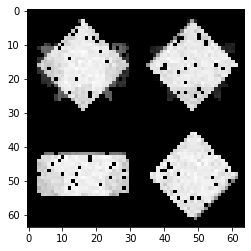

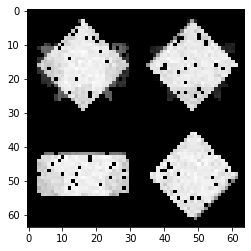

In [9]:
import tensorflow as tf
import numpy as np 
from keras.models import load_model
import matplotlib.pyplot as plt
from numpy import load
import pickle

#pickle_in = open('reconstruction.pkl', 'rb')
#reconstructor = pickle.load(pickle_in)

features_symbol = load('features_data.npy')
#print(tf.constant(features_symbol))
print(features_symbol.shape)

features_symbol_predicted = load('features_predicted.npy')
#print(tf.constant(features_symbol_predicted))
print(features_symbol_predicted.shape)

plt.imshow(features_symbol[1, :, :, 0], cmap='gray')
plt.show()
plt.imshow(features_symbol_predicted[1, :, :, 0], cmap='gray')
plt.show()